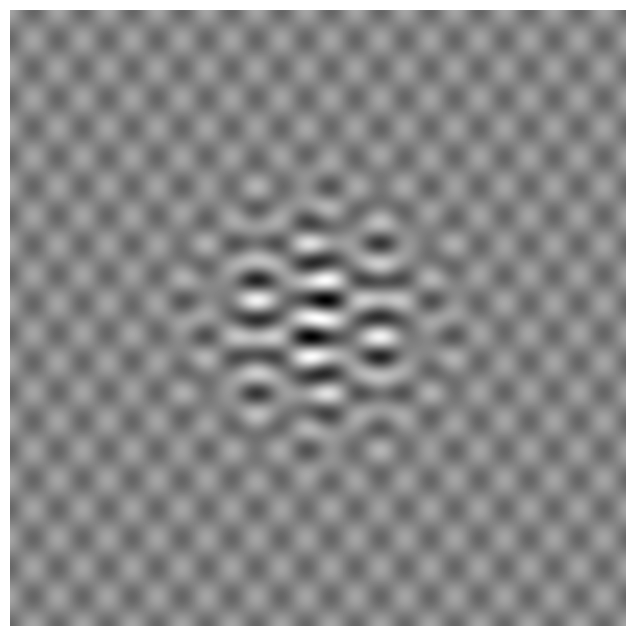

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})


# Creating new data
t = np.arange(-3, 3, 0.01)

U_Sig = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
S_Sig = np.array([[2,0],[0,0.5]])
V_Sig = np.array([np.cos(5*t) * np.exp(-t**2), np.sin(13*t)]).T

X_Sig = U_Sig @ S_Sig @ V_Sig.T

plt.imshow(X_Sig)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

In [2]:
print("X_Sig")
print(X_Sig)

X_Sig
[[ 0.4818552   0.46050777  0.4313887  ... -0.39498947 -0.43138874
  -0.4605078 ]
 [ 0.47964528  0.45839575  0.42941023 ... -0.39317794 -0.42941027
  -0.45839579]
 [ 0.4716375   0.45074273  0.42224113 ... -0.38661375 -0.42224118
  -0.45074278]
 ...
 [-0.45792871 -0.43764128 -0.40996812 ...  0.3753762   0.40996807
   0.43764122]
 [-0.47163754 -0.45074278 -0.42224118 ...  0.38661371  0.42224113
   0.45074273]
 [-0.47964532 -0.45839579 -0.42941027 ...  0.3931779   0.42941023
   0.45839575]]


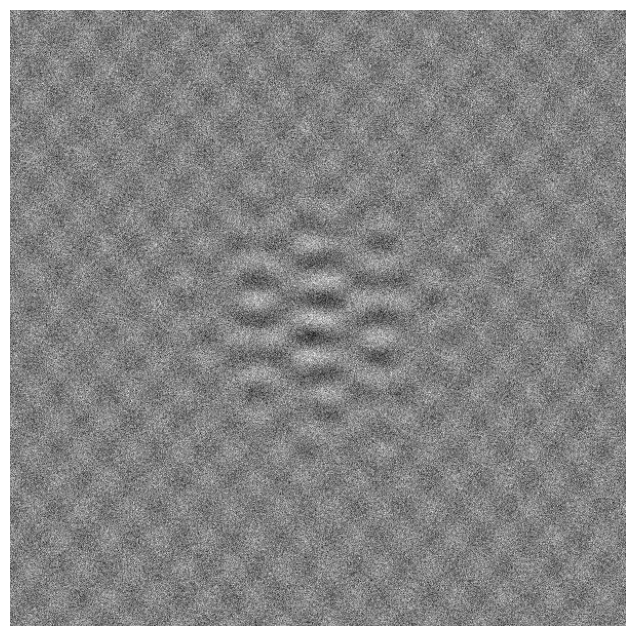

In [3]:
# Adding noise
sigma = 1
X_Noise = X_Sig + sigma*np.random.randn(*X_Sig.shape)
plt.imshow(X_Noise)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

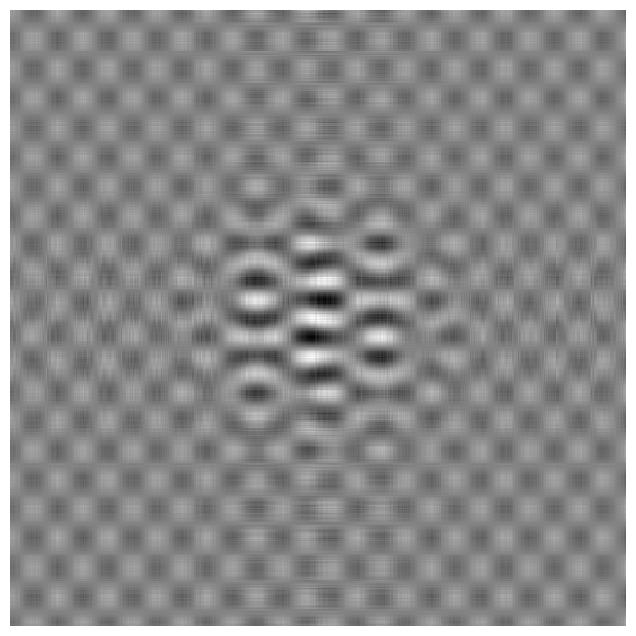

In [4]:
U, S, Vt = np.linalg.svd(X_Noise, full_matrices=0)
N = X_Noise.shape[0]
filter_cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Gavish-Donoho System
r = np.max(np.where(S > filter_cutoff))

X_filtered = U[:, :(r+1)] @ np.diag(S[:(r+1)]) @ Vt[:(r+1),:]
plt.imshow(X_filtered)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

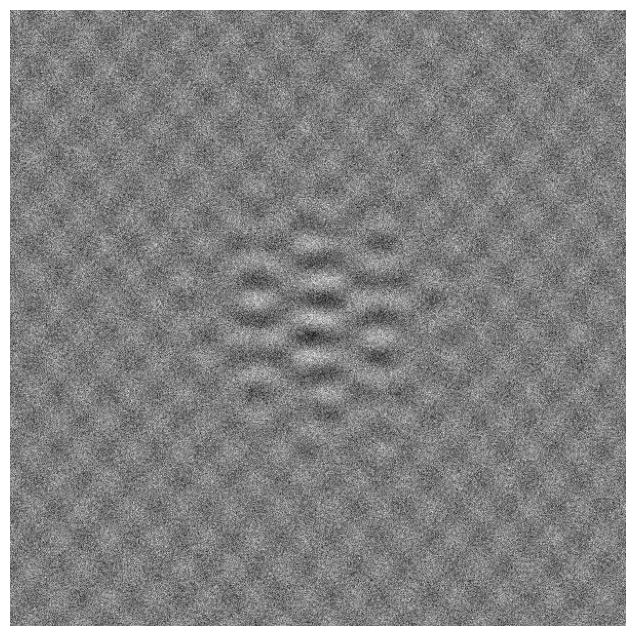

In [6]:
total_Sigma = np.cumsum(S) / np.sum(S)
r90 = np.min(np.where(total_Sigma > 0.9))

# Comparing to if we just kept the 90% of the strongest ones
X_90 = U[:, :(r90+1)] @ np.diag(S[:(r90+1)]) @ Vt[:(r90+1),:]
plt.imshow(X_90)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

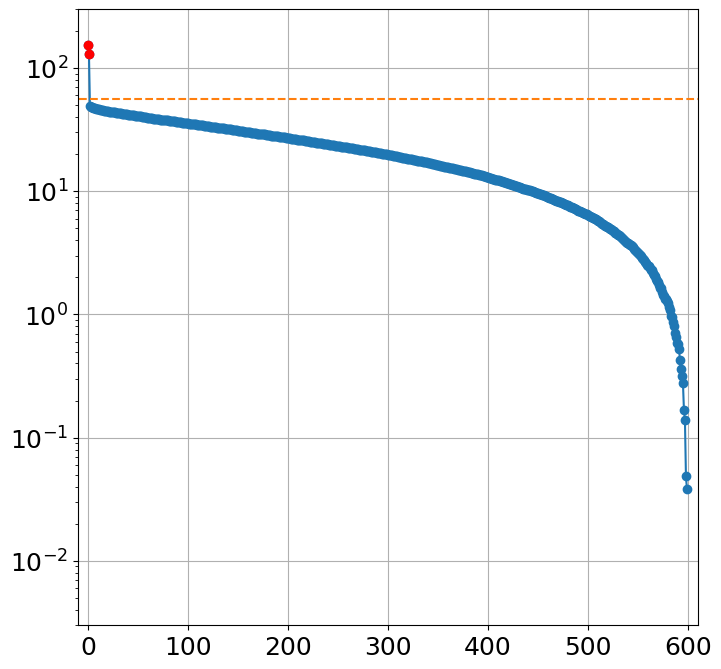

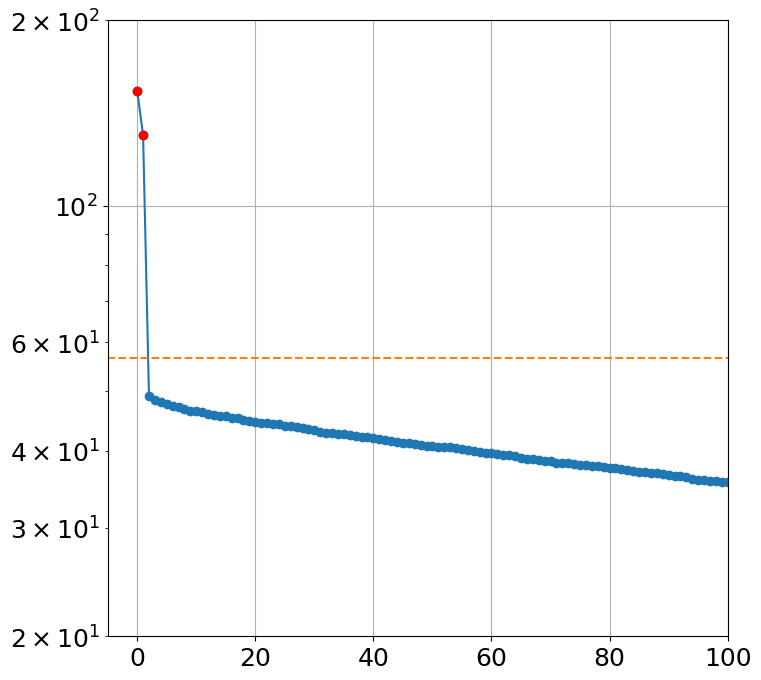

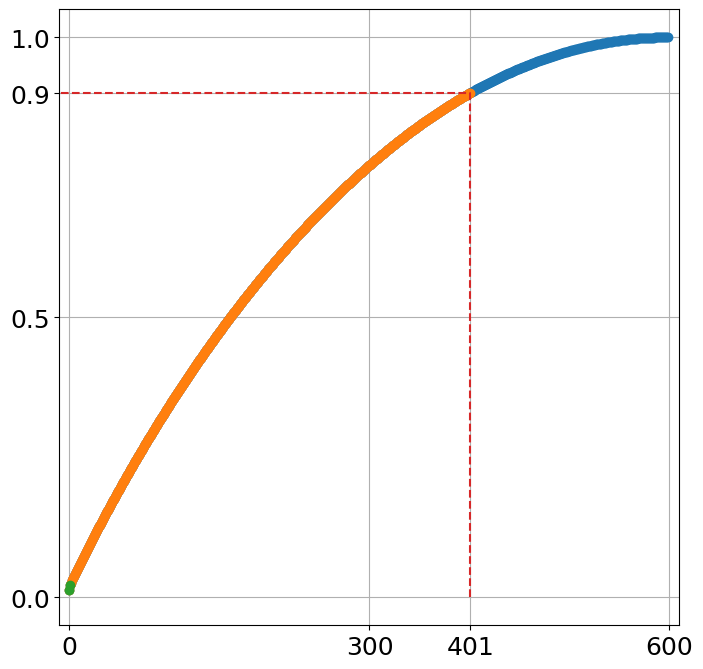

In [22]:
fig, ax =plt.subplots(1)

ax.semilogy(S, '-o')
ax.semilogy(np.diag(S[:(r+1)]), 'o', color='r')
ax.plot(np.array([-20, N+20]), np.array([filter_cutoff, filter_cutoff]), '--')

plt.xlim((-10,610))
plt.ylim((0.003,300))
ax.grid()
plt.show()

fig2, ax2 =plt.subplots(1)

ax2.semilogy(S, '-o')
ax2.semilogy(np.diag(S[:(r+1)]), 'o', color='r')
ax2.plot(np.array([-20, N+20]), np.array([filter_cutoff, filter_cutoff]), '--')

plt.xlim((-5,100))
plt.ylim((20,200))
ax2.grid()
plt.show()

fig3, ax3 = plt.subplots(1)

ax3.plot(total_Sigma, '-o')
ax3.plot(total_Sigma[:(r90+1)], 'o')
ax3.plot(total_Sigma[:(r+1)], 'o')
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim(-10,610)
ax3.plot(np.array([r90, r90, -10]), np.array([0, 0.9, 0.9]), '--')

ax3.grid()
plt.show()

In [ ]:
# Green = what we can keep with truncation
# Orange = extra data stored in standard PCA